## 硬币问题解析

硬币正面朝上的概率为 $ p = \frac{1}{2} $

投掷 n 次才出现正面朝上这一事件满足 **几何分布（Geometric Distribution）**，我们有

$$
P(n) = (1 - p)^{n-1}p = (\frac{1}{2})^n
$$

则求得投掷 n 次才出现正面朝上所获的奖金的期望为

$$
E(n) = P(n) \times 2^n = (\frac{1}{2})^n \times 2^n = 1
$$

在不限制投掷次数的情况下

$$
E = \sum_{n=1}^{\infty}E(n) = \sum_{n=1}^{\infty} 1 = \infty
$$

最后求出的期望为无穷大

若最多只能投掷 k 次，即若 k 次内未投掷出正面，奖金为0。此时的期望为：

$$
E_k = \sum_{n=1}^{k}E(n) = k
$$

k值         | 理论期望值                          | 模拟期望值                         
---------------------------------------------------------------------------
1          | 1.0000                         | 1.0020                        
2          | 2.0000                         | 2.0008                        
3          | 3.0000                         | 3.0021                        
4          | 4.0000                         | 4.0101                        
5          | 5.0000                         | 5.0222                        
6          | 6.0000                         | 6.0095                        
7          | 7.0000                         | 7.0039                        
8          | 8.0000                         | 7.9950                        
9          | 9.0000                         | 8.9945                        
10         | 10.0000                        | 9.8829                        
11         | 11.0000                        | 11.0260                       


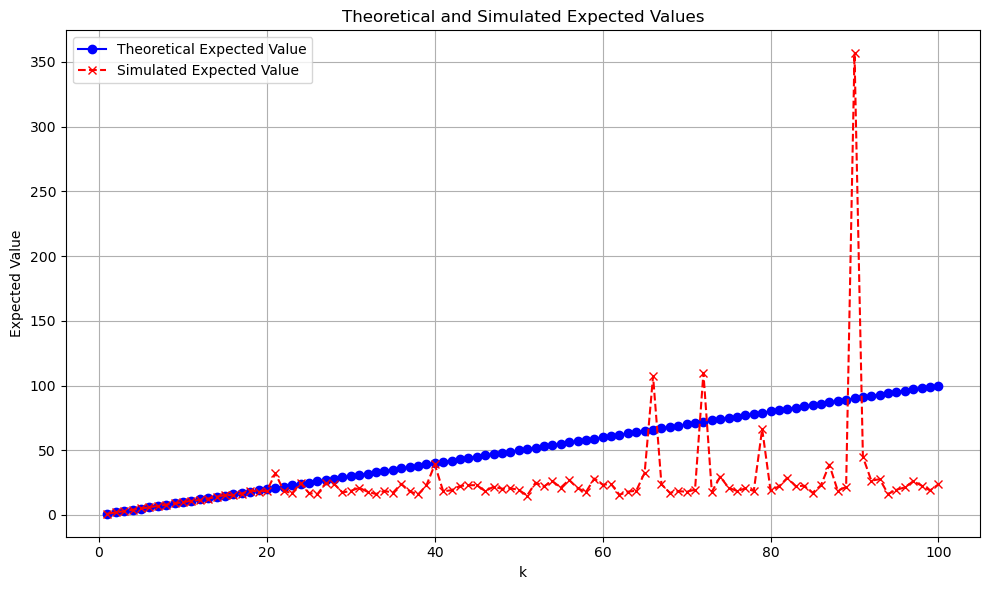

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 模拟计算期望值
def simulate_value(k, trials):
    total_reward = 0
    for _ in range(trials):
        for n in range(1, k + 1):
            if random.choice([0, 1]) == 1: 
                total_reward += 2 ** n
                break
    return total_reward / trials

# 理论期望值
def expected_value(k):
    return k

k_values = list(range(1, 101))
trials = 200000

theoretical = [expected_value(k) for k in k_values]
simulated = [simulate_value(k, trials) for k in k_values]

print(f"{'k值':<10} | {'理论期望值':<30} | {'模拟期望值':<30}")
print("-" * 75)

# 打印结果
for k, theor_val, simul_val in zip(k_values, theoretical, simulated):
    print(f"{k:<10} | {theor_val:<30.4f} | {simul_val:<30.4f}")

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(k_values, theoretical, label='Theoretical Expected Value', marker='o', linestyle='-', color='blue')
plt.plot(k_values, simulated, label='Simulated Expected Value', marker='x', linestyle='--', color='red')
plt.xlabel('k')
plt.ylabel('Expected Value')
plt.title('Theoretical and Simulated Expected Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 代码运行结果分析

我们用样本均值对期望值进行估计，得到模拟计算期望值。

根据上面的结果，我们可以看到，在 k 值较小（约$ k < 20 $）时，此问题的理论期望值与模拟计算期望值接近。而随着 k 值的慢慢增大，理论期望值与模拟计算期望值的差距越来越大。模拟计算期望值十分不稳定：大部分结果落在（10，20）区间内，小于理论期望值；有少数值极大，远超理论期望值。
